In [1]:
#Analyzee and visulaize sentiment pattern in social media data to understand public opinion and attitude towards specific topic or brands.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Importing scikit-learn components
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df = pd.read_csv('/Users/ratirajpandav/Downloads/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [9]:
df['sentiment'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})


In [11]:
df[['text', 'sentiment']].head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative


In [13]:
# Define preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [15]:
nltk.data.find('tokenizers/punkt')

FileSystemPathPointer('/Users/ratirajpandav/nltk_data/tokenizers/punkt')

In [28]:
# Assign the correct column names
df.columns = ['sentiment', 'id', 'date', 'query', 'username', 'text', 'extra_column']

# Optionally, drop the extra column if it's not needed:
df.drop('extra_column', axis=1, inplace=True)

In [30]:
df.columns = ['sentiment', 'id', 'date', 'query', 'username', 'text']

In [32]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   username   1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None
   sentiment          id                          date     query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

          username                                               text  
0  _TheSpecialOne_  @sw

In [38]:
# Map sentiment (0 = negative, 4 = positive)
df['sentiment'] = df['sentiment'].replace({0: 'negative', 4: 'positive'})

# Load stopwords once for better performance
stop_words = set(stopwords.words('english'))

# Vectorized text cleaning function
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return " ".join(word for word in text.split() if word not in stop_words)

# Apply the cleaning function to the text column
df['clean_text'] = df['text'].apply(clean_text)

# Display the cleaned output
print(df[['sentiment', 'clean_text']].head())

NameError: name 're' is not defined

In [40]:
import pandas as pd
import re  # ✅ Importing the re module
from nltk.corpus import stopwords

# Map sentiment (0 = negative, 4 = positive)
df['sentiment'] = df['sentiment'].replace({0: 'negative', 4: 'positive'})

# Download stopwords if not already downloaded (uncomment if required)
# import nltk
# nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Vectorized text cleaning function
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", str(text))  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return " ".join(word for word in text.split() if word not in stop_words)

# Apply the cleaning function to the text column
df['clean_text'] = df['text'].apply(clean_text)

# Display the cleaned output
print(df[['sentiment', 'clean_text']].head())

  sentiment                                         clean_text
0  negative      thats bummer shoulda got david carr third day
1  negative  upset cant update facebook texting might cry r...
2  negative  dived many times ball managed save 50 rest go ...
3  negative                   whole body feels itchy like fire
4  negative                           behaving im mad cant see


In [42]:
# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['predicted_sentiment'] = df['clean_text'].apply(get_sentiment)

# Check results
print(df[['sentiment', 'predicted_sentiment']].head())

NameError: name 'SentimentIntensityAnalyzer' is not defined

In [72]:
#Above code problem , resolve
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download required resources (if not already downloaded)
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Map sentiment (0 = negative, 4 = positive)
df['sentiment'] = df['sentiment'].replace({0: 'negative', 4: 'positive'})

# Load stopwords
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", str(text))  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return " ".join(word for word in text.split() if word not in stop_words)

# Apply the cleaning function and get sentiment
df['clean_text'] = df['text'].apply(clean_text)
df['vader_sentiment'] = df['clean_text'].apply(get_sentiment)

# Display the cleaned output with sentiment
print(df[['sentiment', 'clean_text', 'vader_sentiment']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ratirajpandav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ratirajpandav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  sentiment                                         clean_text vader_sentiment
0  negative      thats bummer shoulda got david carr third day        negative
1  negative  upset cant update facebook texting might cry r...        negative
2  negative  dived many times ball managed save 50 rest go ...        positive
3  negative                   whole body feels itchy like fire        negative
4  negative                           behaving im mad cant see        negative


In [46]:
# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['predicted_sentiment'] = df['clean_text'].apply(get_sentiment)

# Check results
print(df[['sentiment', 'predicted_sentiment']].head())

  sentiment predicted_sentiment
0  negative            negative
1  negative            negative
2  negative            positive
3  negative            negative
4  negative            negative


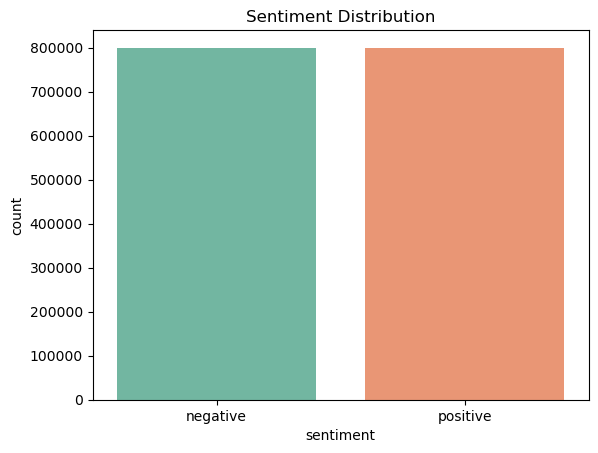

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', hue='sentiment', data=df, palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.show()

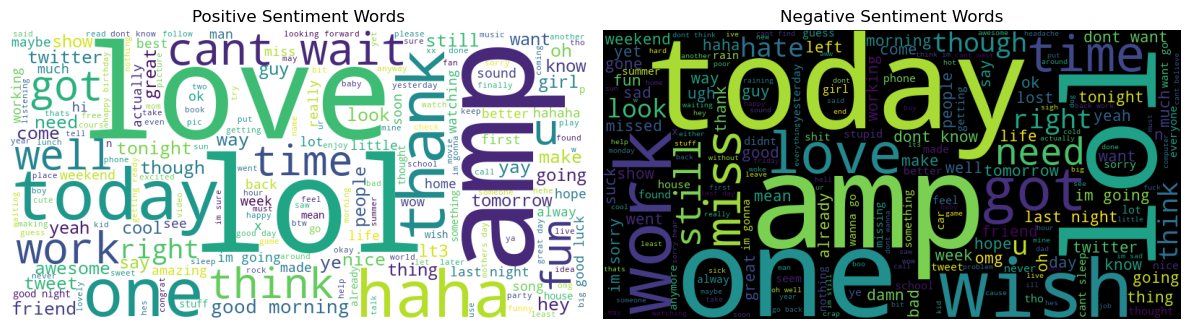

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure WordCloud is installed (Run this in a terminal if necessary)
# !pip install wordcloud

# Generate positive and negative text
positive_text = ' '.join(df[df['sentiment'] == 'positive']['clean_text'])
negative_text = ' '.join(df[df['sentiment'] == 'negative']['clean_text'])

# Generate Word Clouds
plt.figure(figsize=(12, 6))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_text))
plt.axis('off')
plt.title('Positive Sentiment Words')

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=800, height=400, background_color='black').generate(negative_text))
plt.axis('off')
plt.title('Negative Sentiment Words')

plt.tight_layout()
plt.show()

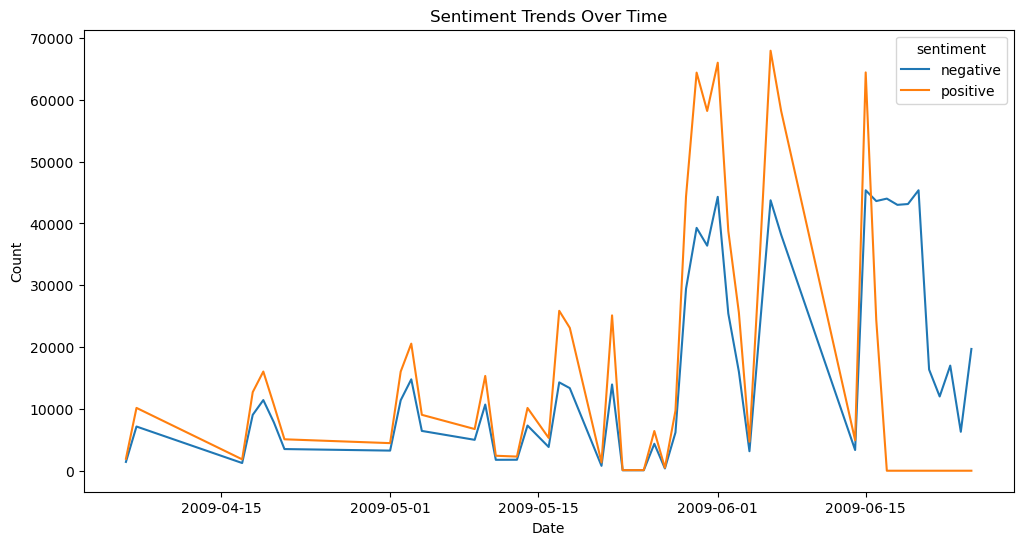

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' is a string before using .str.replace()
df['date'] = df['date'].astype(str)

# Remove timezone information (e.g., 'PDT', 'EST', etc.)
df['date'] = df['date'].str.replace(r'\s\w{3}$', '', regex=True)

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group sentiment over time
sentiment_trends = df.groupby(df['date'].dt.date)['sentiment'].value_counts().unstack().fillna(0)

# Plot sentiment trends
sentiment_trends.plot(figsize=(12, 6))
plt.title('Sentiment Trends Over Time')
plt.ylabel('Count')
plt.xlabel('Date')
plt.show()

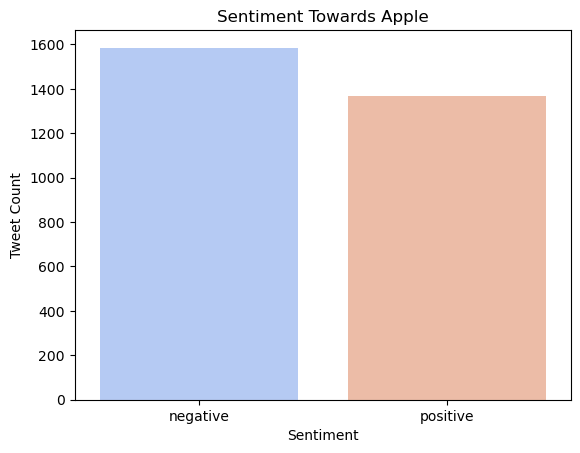

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter tweets mentioning 'apple'
apple_tweets = df[df['clean_text'].str.contains('apple', case=False)]

# Create a count plot with updated syntax
sns.countplot(x='sentiment', hue='sentiment', data=apple_tweets, palette='coolwarm', legend=False)

plt.title('Sentiment Towards Apple')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

              precision    recall  f1-score   support

    negative       0.79      0.38      0.52    800000
     neutral       0.00      0.00      0.00         0
    positive       0.65      0.62      0.63    800000

    accuracy                           0.50   1600000
   macro avg       0.48      0.33      0.38   1600000
weighted avg       0.72      0.50      0.57   1600000



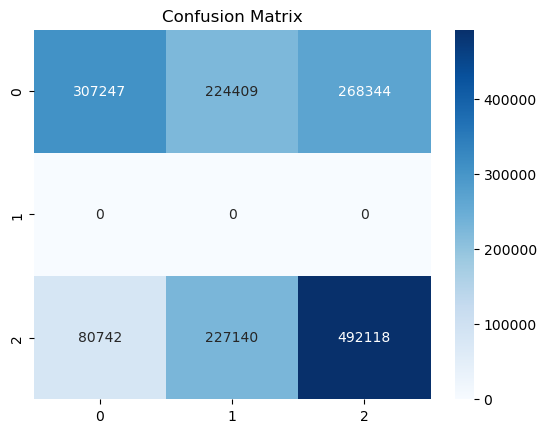

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Avoid undefined metric warning
print(classification_report(df['sentiment'], df['predicted_sentiment'], zero_division=0))

# Display confusion matrix
sns.heatmap(confusion_matrix(df['sentiment'], df['predicted_sentiment']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()